In [2]:
#3  Image compression using clustering [30 points]
#In this programming assignment, you are going to apply clustering algorithms for image compression.  
#Your task is implementing the clustering parts with two algorithms:K-means and K-medoids.
#It is required you implementing the algorithms yourself rather than calling from a package.


In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy.matlib
import os

### Input

In [60]:
# the image representation. Each row contains one data points (pixel)
# for image dataset, it contains 3 columns, each column corresponding to
# Red, Green, and Blue component. Each component has an int value 0-255
path = '/Users/lars-manuelschneider/Downloads/data/beach.bmp'
pixels = imageio.imread(path)
image = imageio.imread(path)

(214, 320, 3)

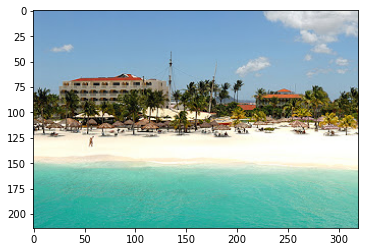

In [61]:
plt.imshow(pixels)
pixels.shape

In [62]:
# Preprocessing
pixels= (pixels/255).reshape(pixels.shape[0]*pixels.shape[1],3)

In [63]:
pixels
pixels.shape

(68480, 3)

In [64]:
pixels

Array([[0.43137255, 0.60392157, 0.78823529],
       [0.43137255, 0.60392157, 0.78823529],
       [0.43137255, 0.60392157, 0.78823529],
       ...,
       [0.38823529, 0.70588235, 0.67058824],
       [0.37254902, 0.70196078, 0.64313725],
       [0.37254902, 0.70196078, 0.64313725]])

In [65]:
# create random initial centroids 
def initial_centroids(X, k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    idx = np.random.randint(0,m,k)
    
    for i in range (k):
        centroids[i,:] = X[idx[i],:]
    return centroids

In [66]:
#the number of desired cluster
cluster = 4
in_centroids = initial_centroids(pixels,cluster)

In [67]:
in_centroids

array([[0.67843137, 0.7254902 , 0.77254902],
       [0.0627451 , 0.06666667, 0.04313725],
       [0.98823529, 0.9254902 , 0.82352941],
       [0.99215686, 0.94509804, 0.84313725]])

In [11]:
len(in_centroids)

4

# K-Means

In [12]:
# start the algorithm by guessing the initial centroids for each cluster
# and then repeatedly assign instances to the nearest cluster and re-compute
# the centroid of the cluster.

In [13]:
# funtion that is able to find the closest centroid for each instance in
# the data
def closest_centroid(X, centroids):
    ph = np.zeros((len(X)))
    
    
    for i in range(len(X)):
        distance = 99999 #init
        
        for j in range(len(centroids)):
            if np.sum(np.square(abs(X[i,:]-centroids[j,:])))<distance:
                distance=np.sum(np.square(abs(X[i,:]-centroids[j,:])))
                ph[i] = j
    return ph
#, distance

In [14]:
#idx, distance = closest_centroid(pixels, in_centroids)
idx = closest_centroid(pixels, in_centroids)

In [15]:
#compute the centroid of a cluster, in the vernacular the centroid is defeined
# as the mean of all data points currently assigned to a certain cluster (different between means and mediods)
def adjust_centroids(X,idx,k):
    m,n = X.shape # number of rows, columns
    centroids=np.zeros((k,n))
    for i in range(0,k):
        temp = idx==i #The result will contain T/F values. 
        temp = temp.astype(int) #Let's change the results to 1 and 0. 1 if the point belong to centroid i, 0 otherwise
        counter = sum(temp); #total number of points. We will use this to calculate the mean of all points
        temp.resize((np.size(X,0),1)) #from array to one long column of ones
        total_matrix = np.matlib.repmat(temp,1,n) #repeat the 1 column three times (RBG)
        temp = np.multiply(X,total_matrix) #filter data to only those belong to centroid i
        centroids[i] = (1/counter)*np.sum(temp,axis=0) #sum each column and divide by total = average.  
    return centroids

In [16]:
adjust_centroids(pixels, idx, cluster)

array([[0.40161297, 0.72554319, 0.63248724],
       [0.76842367, 0.82076195, 0.82285074],
       [0.37601816, 0.43543181, 0.45018771],
       [0.30872092, 0.65940664, 0.7004413 ]])

In [17]:
def k_means(X, initial_centroids, iter):
    centroids = initial_centroids
    counter = 0
    for i in range(iter):
        #idx, distance = closest_centroid(X, centroids)
        idx = closest_centroid(X, centroids)
        centroids = adjust_centroids(X, idx, len(centroids))
        counter = counter + 1
        #print(counter, distance)
        
    return idx, centroids


In [18]:
idx, centroids = k_means(pixels, in_centroids, 5)

In [19]:
idx

array([0., 0., 0., ..., 3., 3., 3.])

In [26]:
def compress_image(means, index, img): 

    # recovering the compressed image by 
    # assigning each pixel to its corresponding centroid. 
    centroid = np.array(means) 
    recovered = centroid[index.astype(int), :] 
    
    # getting back the 3d matrix (row, col, rgb(3)) 
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1], img.shape[2])) 

    # plotting the compressed image. 
    plt.imshow(recovered) 
    plt.show()

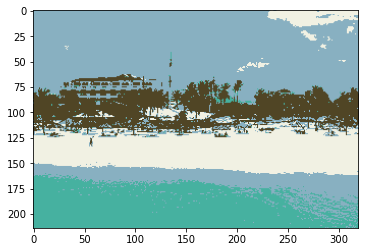

In [21]:
#compressed_pic = centroids[idx.astype(int),:]
#print(compressed_pic)
compressed_pic = compress_image(centroids, idx, image)

### Output

In [22]:
df = pd.DataFrame(data = idx, columns = ['cluster_assignment'])

In [23]:
df = df["cluster_assignment"].value_counts()
df.head()

0.0    31780
1.0    13695
3.0    12585
2.0    10420
Name: cluster_assignment, dtype: int64

In [24]:
for i in range (cluster):
    print(df[i]/sum(df))

0.4640771028037383
0.19998539719626168
0.15216121495327103
0.18377628504672897


In [26]:
centroids = centroids*255


In [27]:
centroids

array([[136.53426683, 176.05481435, 193.17287602],
       [241.77108434, 241.60292077, 227.15217233],
       [ 80.33224568,  69.09078695,  37.59241843],
       [ 70.5121176 , 177.21001192, 160.99912594]])

### Football Picture

(412, 620, 3)

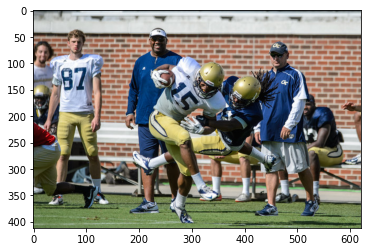

In [28]:
# the image representation. Each row contains one data points (pixel)
# for image dataset, it contains 3 columns, each column corresponding to
# Red, Green, and Blue component. Each component has an int value 0-255
path = '/Users/lars-manuelschneider/Downloads/data/football.bmp'
pixels_2 = imageio.imread(path)
image_2 = imageio.imread(path)
plt.imshow(pixels_2)
pixels_2.shape

In [29]:
# Preprocessing
pixels_2 = (pixels_2/255).reshape(pixels_2.shape[0]*pixels_2.shape[1],3)

In [30]:
#the number of desired cluster
cluster_2 = 4
in_centroids_2 = initial_centroids(pixels_2,cluster_2)

In [31]:
#idx, distance = closest_centroid(pixels, in_centroids)
idx_2 = closest_centroid(pixels_2, in_centroids_2)

In [32]:
adjust_centroids(pixels_2, idx_2, cluster_2)

array([[0.48782482, 0.45639247, 0.36612969],
       [0.12178255, 0.15081486, 0.17036779],
       [0.83272278, 0.857298  , 0.88125192],
       [0.729901  , 0.68700491, 0.62681956]])

In [33]:
idx_2, centroids_2 = k_means(pixels_2, in_centroids_2, 5)

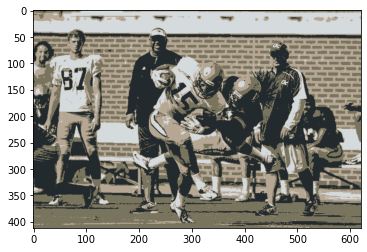

In [34]:
#compressed_pic = centroids[idx.astype(int),:]
#print(compressed_pic)
compressed_pic_2 = compress_image(centroids_2, idx_2, image_2)

### Output

In [35]:
df_2 = pd.DataFrame(data = idx_2, columns = ['cluster_assignment'])

In [36]:
df_2 = df_2["cluster_assignment"].value_counts()
df_2.head()

0.0    81303
1.0    73018
3.0    57850
2.0    43269
Name: cluster_assignment, dtype: int64

In [37]:
for i in range (cluster_2):
    print(df_2[i]/sum(df_2))

0.3182860945818979
0.2858518634512997
0.16939007203257125
0.22647196993423113


In [38]:
centroids_2 = centroids_2*255
centroids_2

array([[121.86450684, 116.44380896,  93.50737365],
       [ 35.87582514,  42.45279246,  45.7037032 ],
       [213.2065451 , 218.03492108, 221.21553537],
       [182.97830596, 167.74212619, 149.9058427 ]])

### Own Picture

(200, 300, 3)

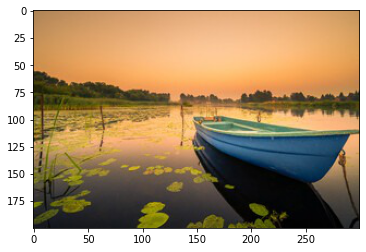

In [39]:
path = '/Users/lars-manuelschneider/Downloads/data/Boat.jpeg'
pixels_3 = imageio.imread(path)
image_3 = imageio.imread(path)
plt.imshow(pixels_3)
pixels_3.shape

In [40]:
# Preprocessing
pixels_3 = (pixels_3/255).reshape(pixels_3.shape[0]*pixels_3.shape[1],3)

In [41]:
#the number of desired cluster
cluster_3 = 4
in_centroids_3 = initial_centroids(pixels_3,cluster_3)

In [42]:
#idx, distance = closest_centroid(pixels, in_centroids)
idx_3 = closest_centroid(pixels_3, in_centroids_3)

In [43]:
adjust_centroids(pixels_3, idx_3, cluster_3)

array([[0.81261286, 0.60964191, 0.36879131],
       [0.98795048, 0.74974843, 0.49339619],
       [0.22627805, 0.23140658, 0.17963045],
       [0.94758811, 0.72124232, 0.52172207]])

In [44]:
idx_3, centroids_3 = k_means(pixels_3, in_centroids_3, 5)

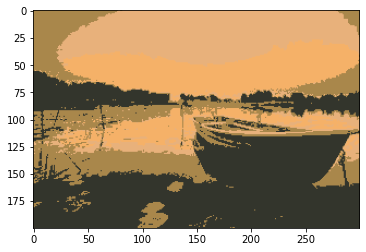

In [45]:
#compressed_pic = centroids[idx.astype(int),:]
#print(compressed_pic)
compressed_pic_3 = compress_image(centroids_3, idx_3, image_3)

### Output

In [46]:
df_3 = pd.DataFrame(data = idx_3, columns = ['cluster_assignment'])

In [47]:
df_3 = df_3["cluster_assignment"].value_counts()
df_3.head()

2.0    22875
0.0    13046
3.0    12856
1.0    11223
Name: cluster_assignment, dtype: int64

In [48]:
for i in range (cluster_3):
    print(df_3[i]/sum(df_3))

0.21743333333333334
0.18705
0.38125
0.21426666666666666


In [49]:
centroids_3 = centroids_3*255
centroids_3

array([[169.28054576, 135.04146865,  75.8755174 ],
       [245.64652945, 177.80896374, 104.9348659 ],
       [ 51.26631694,  53.93897268,  44.93962842],
       [232.56238332, 177.00668948, 123.27815806]])

# K-Medoid

### Beach Pic

(214, 320, 3)

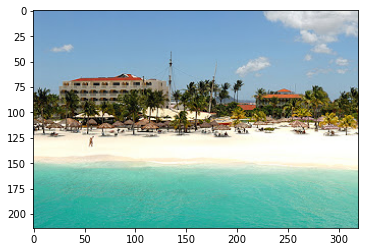

In [2]:
# Use the same procedure for the K-Medoids algorithm
path = '/Users/lars-manuelschneider/Downloads/data/beach.bmp'
pixels_med = imageio.imread(path)
image_med = imageio.imread(path)
plt.imshow(pixels_med)
pixels_med.shape

In [3]:
# Preprocessing
pixels_med= (pixels_med/255).reshape(pixels_med.shape[0]*pixels_med.shape[1],3)

In [25]:
pixels_med

Array([[0.43137255, 0.60392157, 0.78823529],
       [0.43137255, 0.60392157, 0.78823529],
       [0.43137255, 0.60392157, 0.78823529],
       ...,
       [0.38823529, 0.70588235, 0.67058824],
       [0.37254902, 0.70196078, 0.64313725],
       [0.37254902, 0.70196078, 0.64313725]])

In [7]:
# choose random initial medoids, but this time based on "real" values of the data set
import random

def initial_medoids(X, k):
    medoids = np.zeros((k,3))
    for i in range (k):
        medoids[i] = random.choice(X)
    return medoids

In [8]:
#the number of desired cluster
cluster_med = 4
in_medoids = initial_medoids(pixels_med,cluster_med)
in_medoids

array([[0.3254902 , 0.76078431, 0.68627451],
       [0.95686275, 0.89803922, 0.82352941],
       [0.10588235, 0.11372549, 0.05882353],
       [0.16862745, 0.12156863, 0.05882353]])

In [9]:
pixels_med

Array([[0.43137255, 0.60392157, 0.78823529],
       [0.43137255, 0.60392157, 0.78823529],
       [0.43137255, 0.60392157, 0.78823529],
       ...,
       [0.38823529, 0.70588235, 0.67058824],
       [0.37254902, 0.70196078, 0.64313725],
       [0.37254902, 0.70196078, 0.64313725]])

In [11]:
# funtion that is able to find the closest medoid for each instance in
# the data - pretty much the same algo like k-means
def closest_medoids(X, medoids):
    ph = np.zeros((len(X)))
    
    
    for i in range(len(X)):
        distance = 99999 #init
        
        for j in range(len(medoids)):
            if np.sum(np.square(abs(X[i,:]-medoids[j,:])))<distance:
                distance=np.sum(np.square(abs(X[i,:]-medoids[j,:])))
                ph[i] = j
    return ph
#, distance

In [16]:
idx_medoid = closest_medoids(pixels_med, in_medoids)
idx_medoid


array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
sum(idx_medoid)

42793.0

In [19]:
#test euclidean distance
a = np.array((0,0,0))
b = np.array((1,1,1))

dist1 = np.linalg.norm(a-b)
dist1

1.7320508075688772

In [20]:
# adjust medoids difference between k-means and k-medoids. Not the mean of all the data points but
# switch to another data point in the data set to get a better Sum Squared Error (SSE)
# first import necessary py libs
import scipy.misc
import scipy.spatial.distance as sc

def adjust_medoids(X,idx,K):
    # number of columns --> RGB always 3
    c = 3
    medoids = np.zeros((K,c))
    for i in range(0,K):
        # for every different medoid
        medoid = idx==i 
        cluster = X[medoid] #Those points are this cluster
        if (cluster.size == 0): break
        temp = np.unique(cluster, axis=0)
        temp = sc.pdist(temp, 'euclidean')
        temp = sc.squareform(temp)
        temp = temp.sum(axis=1)
        min_indx = np.argmin(temp, axis=0)
        medoids[i] = cluster[min_indx]
        
    return medoids

In [21]:
adjust_medoids(pixels_med, idx_medoid, cluster_med)

array([[0.4627451 , 0.63921569, 0.8       ],
       [1.        , 0.91764706, 0.8       ],
       [0.09803922, 0.11372549, 0.01568627],
       [0.18431373, 0.10588235, 0.        ]])

In [22]:
def k_medoid(X, initial_medoids, iter):
    medoids = initial_medoids
    counter = 0
    # also tried with stop when converges but takes forever with k-medoids
    for i in range(iter):
        #idx, distance = closest_medoids(X, medoids)
        idx = closest_medoids(X, medoids)
        medoids = adjust_medoids(X, idx, len(medoids))
        counter = counter + 1
        #print(counter, distance)
        
    return idx, medoids



In [23]:
iterations = 5
idx_medoid, medoids = k_medoid(pixels_med, in_medoids, iterations)

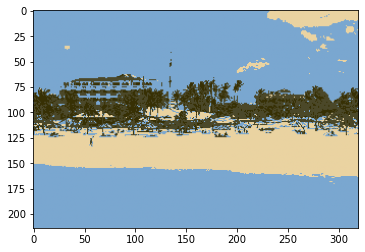

In [27]:
#compressed_pic = centroids[idx.astype(int),:]
#print(compressed_pic)
compressed_pic_med = compress_image(medoids, idx_medoid, image_med)

### Output

In [28]:
df_med = pd.DataFrame(data = idx_medoid, columns = ['cluster_assignment'])

In [29]:
df_med = df_med["cluster_assignment"].value_counts()
df_med.head()

0.0    43229
1.0    14733
3.0     7360
2.0     3158
Name: cluster_assignment, dtype: int64

In [30]:
for i in range (cluster_med):
    print(df_med[i]/sum(df_med))

0.6312646028037383
0.2151431074766355
0.046115654205607474
0.10747663551401869


In [31]:
medoids = medoids*255
medoids

array([[122., 167., 208.],
       [234., 211., 161.],
       [ 55.,  48.,   4.],
       [ 75.,  72.,  41.]])

# Football Pic

(412, 620, 3)

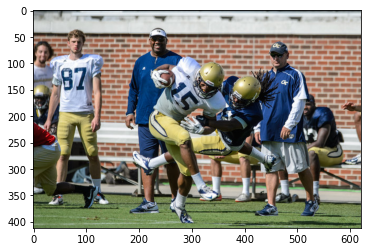

In [32]:
# the image representation. Each row contains one data points (pixel)
# for image dataset, it contains 3 columns, each column corresponding to
# Red, Green, and Blue component. Each component has an int value 0-255
path = '/Users/lars-manuelschneider/Downloads/data/football.bmp'
pixels_med2 = imageio.imread(path)
image_med2 = imageio.imread(path)
plt.imshow(pixels_med2)
pixels_med2.shape

In [33]:
# Preprocessing
pixels_med2 = (pixels_med2/255).reshape(pixels_med2.shape[0]*pixels_med2.shape[1],3)

In [34]:
#the number of desired cluster
cluster_med2 = 4
in_medoids2 = initial_medoids(pixels_med2,cluster_med2)

In [35]:
idx_med2 = closest_medoids(pixels_med2, in_medoids2)

In [36]:
adjust_medoids(pixels_med2, idx_med2, cluster_med2)

array([[0.22745098, 0.23921569, 0.01568627],
       [0.85882353, 0.8745098 , 0.88627451],
       [0.66666667, 0.39215686, 0.29019608],
       [0.34509804, 0.34117647, 0.15294118]])

In [37]:
idx_med2, medoids2 = k_medoid(pixels_med2, in_medoids2, 5)

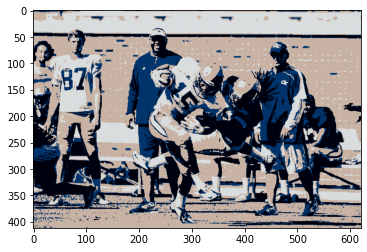

In [38]:
compressed_pic_med2 = compress_image(medoids2, idx_med2, image_med2)

### Output

In [39]:
df_med2 = pd.DataFrame(data = idx_med2, columns = ['cluster_assignment'])

In [40]:
df_med2 = df_med2["cluster_assignment"].value_counts()
df_med2.head()

2.0    109719
3.0     56926
1.0     50944
0.0     37851
Name: cluster_assignment, dtype: int64

In [41]:
for i in range (cluster_med2):
    print(df_med2[i]/sum(df_med2))

0.14817961165048543
0.19943626683369872
0.4295294393986846
0.22285468211713122


In [42]:
medoids2 = medoids2*255
medoids2

array([[  1.,  52., 107.],
       [217., 221., 222.],
       [200., 178., 164.],
       [  0.,   1.,  14.]])

### Own Picture

(200, 300, 3)

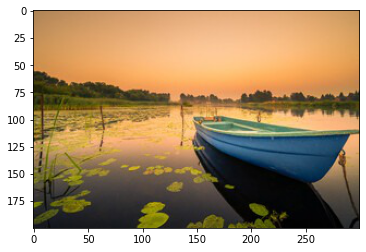

In [43]:
# the image representation. Each row contains one data points (pixel)
# for image dataset, it contains 3 columns, each column corresponding to
# Red, Green, and Blue component. Each component has an int value 0-255
path = '/Users/lars-manuelschneider/Downloads/data/Boat.jpeg'
pixels_med3 = imageio.imread(path)
image_med3 = imageio.imread(path)
plt.imshow(pixels_med3)
pixels_med3.shape

In [44]:
# Preprocessing
pixels_med3 = (pixels_med3/255).reshape(pixels_med3.shape[0]*pixels_med3.shape[1],3)

In [45]:
#the number of desired cluster
cluster_med3 = 4
in_medoids3 = initial_medoids(pixels_med3,cluster_med3)

In [46]:
idx_med3 = closest_medoids(pixels_med3, in_medoids3)

In [47]:
adjust_medoids(pixels_med3, idx_med3, cluster_med3)

array([[0.90980392, 0.67843137, 0.45098039],
       [0.10588235, 0.30588235, 0.41960784],
       [0.86666667, 0.64705882, 0.40784314],
       [0.6627451 , 0.54117647, 0.21960784]])

In [48]:
idx_med3, medoids3 = k_medoid(pixels_med3, in_medoids3, 5)

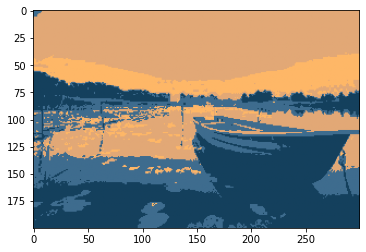

In [49]:
compressed_pic_med3 = compress_image(medoids3, idx_med3, image_med3)

### Output

In [50]:
df_med3 = pd.DataFrame(data = idx_med3, columns = ['cluster_assignment'])

In [51]:
df_med3 = df_med3["cluster_assignment"].value_counts()
df_med3.head()

0.0    23654
1.0    18297
3.0    11596
2.0     6453
Name: cluster_assignment, dtype: int64

In [52]:
for i in range (cluster_med3):
    print(df_med3[i]/sum(df_med3))

0.3942333333333333
0.30495
0.10755
0.19326666666666667


In [53]:
medoids3 = medoids3*255
medoids3

array([[226., 168., 118.],
       [ 20.,  64.,  93.],
       [254., 183., 103.],
       [ 62., 108., 142.]])